# K-Nearest Neighbours - Simple Cross Validation

Checking the Preidction behaviour when we follow Simple Cross Validataion Set approach.

Iris Dataset will be used for this study

I am splitting the given Iris Data into

60% as Training Dataset
20% as Cross Validation DataSet
20% for Test Dataset for validating the model

Euclidean Distance is used in this test

In [1]:
# Importing required modules
from math import * # for math operation
import operator # for selection
import pandas as pd # for handling iris dataset
from sklearn.model_selection import train_test_split # for splitting dataset into train/test
from matplotlib import pyplot as plt

from scipy.spatial import distance # euclidean distance

%matplotlib inline

## Load DataSet

In [2]:
df = pd.read_csv('./iris.data')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Split DataSet

In [3]:
# Split the data and labels for easy handling
# 60% training
# 20% for cross-validation
# 20% for testing
df_train, df_test = train_test_split(df, test_size=0.4)
df_test, df_cv = train_test_split(df_test, test_size=0.5)

print(df_train.shape, df_cv.shape, df_test.shape)

(90, 5) (30, 5) (30, 5)


In [4]:
#df_train.head(20)
print('Train Data Indices: ', df_train.index.values)
print('CV Data Indices: ', df_cv.index.values)
print('Test Data Indices: ', df_test.index.values)

Train Data Indices:  [138  44  33  22  26  49  66 108 122  53  13  40 118  73 140  39  41  70
  35 115 111  90  28  55 146  17  31  23 106  81  97  79  51  50  19  29
  69   4 116  46 107  91 127  25  65  63  30  82 101  71 119  94 139  52
  85  80   2 143 148   7  38  56  61  54  96 110  27  58  20 113 132 125
  43 129 103   8  15  37  60 142  21  92 126   0  45  87  18  47  83 137]
CV Data Indices:  [ 42  89   6 117  36   3  62 100 149  76 136 133  93 128 124 144   9  99
   5  95  57  72  10 120  11  32  77   1  88  24]
Test Data Indices:  [ 48 145  98 130 105 134  14  78  12 141 109  67  75 123 135  64  34 131
 104 147 121  59  68 112 102  16  86  84  74 114]


## Calculating Neighbors

In [5]:
def getNeighbours(training_data_set, query_point, k):
    '''
    returns list having k neighbors to the given query data point
    input:
        training_data_set: Pandas DataFrame
        query_point: Pandas DataSeries
        k: Number of Neighbors to calculate
        Euclidean distance is used to calculate the distance
    Output:
        List of k nearest data points
    '''
    distances = [] # list to hold all the neighbors
    
    # calcualte distance between query_point and every point in data set
    # create a list
    for x in range(len(training_data_set)):
        # stip non-numeric label - in training data
        v1 = training_data_set.iloc[x]
        v1 = v1[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        #print(type(v1), v1)
        
        # stip non-numeric label - in query data
        q_v = query_point[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        dist = distance.euclidean(q_v, v1)
        distances.append((dist, training_data_set.iloc[x]))
        
    # sort the list in ascending order
    distances.sort(key=lambda tup:tup[0])
    #print(distances)
    
    # select k nearest neighbors and return it
    neighbors = []
    for i in range(k):
        neighbors.append(distances[i][1])
    return neighbors

## Calculating Responses

In [6]:
def getClassLabelBasedOnMajorityVote(neighbors):
    '''
    returns the class label having majority vote
    Note that it doesn't handle 'Not Sure' case yet
    '''
    class_votes = {} # dictionary keys are flowers, values are its counts
    for x in range(len(neighbors)):
        class_label = neighbors[x][-1]
        if class_label in class_votes:
            class_votes[class_label] += 1
        else:
            class_votes[class_label] = 1
    
    response = max(class_votes.items(), key=operator.itemgetter(1))[0]
    return response

## Accuracy of Predictions

- Try to check accuray for k in range 1 to 9 of odd k values

In [7]:
# Max number of k that need to be tried
max_k = 11
max_repeat = 5

def getKRange():
    '''
    returns the range of k values that need to tried for this test
    '''
    return range(1,max_k,2)

In [8]:
def getPredictions(df_training_data_set, df2, k_range):
    '''
    function to get predictions of df2 using df_training_data_set 
    Input:
        df_training_data_set
            data set that need to be used as training dataset
        df2
            data set for which predictions need to be made
        k_range
            range of k for which k-NN need to be predicted
    Output:
        returns a list having prediction accuracy for each k in the given range
    '''
    accuracy_results = []
    for k in k_range: #range(1,max_k,2):
        correct_predictions = 0
        for t_index in range(len(df2)):
            test_data_point = df2.iloc[t_index]
            neighbors = getNeighbours(df_train, test_data_point, k)
            predicted_class = getClassLabelBasedOnMajorityVote(neighbors)
            if predicted_class == test_data_point['species']:
                correct_predictions += 1
            #print('Predicted: ', predicted_class, ' Actual: ', test_data_point['species'])

        accuracy = round((correct_predictions/len(df2)) * 100,3)
        print('k=',k,' Accuracy: ', accuracy,', Total correct predictions: ', correct_predictions, ' out of ', len(df2))
        accuracy_results.append(accuracy)

    error_results = [round(100-x,3) for x in accuracy_results]
    print(accuracy_results, error_results)
    return accuracy_results, error_results

In [9]:
%%time

# Calculating Training Error Rate

training_accuracy, training_error_rate = getPredictions(df_train, df_train, getKRange())
print('Training Error Rate: ', training_error_rate)

k= 1  Accuracy:  100.0 , Total correct predictions:  90  out of  90
k= 3  Accuracy:  96.667 , Total correct predictions:  87  out of  90
k= 5  Accuracy:  97.778 , Total correct predictions:  88  out of  90
k= 7  Accuracy:  95.556 , Total correct predictions:  86  out of  90
k= 9  Accuracy:  95.556 , Total correct predictions:  86  out of  90
[100.0, 96.667, 97.778, 95.556, 95.556] [0.0, 3.333, 2.222, 4.444, 4.444]
Training Error Rate:  [0.0, 3.333, 2.222, 4.444, 4.444]
CPU times: user 1min 30s, sys: 872 ms, total: 1min 30s
Wall time: 1min 30s


In [10]:
%%time

# Calculating Cross-Validation Error Rate

cv_accuracy, cv_error_rate = getPredictions(df_train, df_cv, getKRange())
print('Cross-Validation Error Rate:', cv_error_rate)

k= 1  Accuracy:  93.333 , Total correct predictions:  28  out of  30
k= 3  Accuracy:  96.667 , Total correct predictions:  29  out of  30
k= 5  Accuracy:  93.333 , Total correct predictions:  28  out of  30
k= 7  Accuracy:  96.667 , Total correct predictions:  29  out of  30
k= 9  Accuracy:  100.0 , Total correct predictions:  30  out of  30
[93.333, 96.667, 93.333, 96.667, 100.0] [6.667, 3.333, 6.667, 3.333, 0.0]
Cross-Validation Error Rate: [6.667, 3.333, 6.667, 3.333, 0.0]
CPU times: user 29.9 s, sys: 322 ms, total: 30.3 s
Wall time: 30.1 s


Text(0.5, 1.0, 'cv_error')

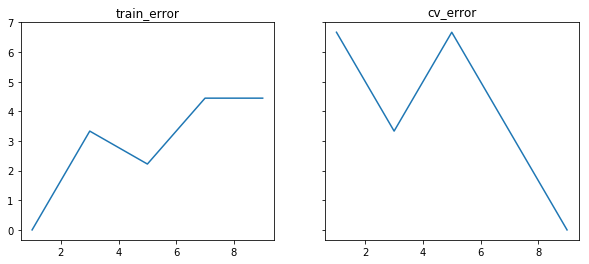

In [11]:
# Visualize Trianing and Cross-Validation Error Rate

fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')

fig.set_figwidth(10)
fig.set_figheight(4)

ax1.plot(getKRange(), training_error_rate)
ax1.set_title('train_error')

ax2.plot(getKRange(), cv_error_rate)
ax2.set_title('cv_error')

# k-NN Observation on CV Accuracy Result

- Based on above training and cv erro rate observation, k=7 look optimal

# k-NN Test Accuracy

Based on above observation, k=7 is optimal value for Iris Dataset classification

In [16]:
%%time

chosen_k = 7

test_accuracy, test_error_rate = getPredictions(df_train, df_test, [chosen_k])
print('Test Error Rate:', test_error_rate)

k= 7  Accuracy:  100.0 , Total correct predictions:  30  out of  30
[100.0] [0.0]
Test Error Rate: [0.0]
CPU times: user 5.93 s, sys: 76.3 ms, total: 6 s
Wall time: 5.98 s


## Observation

0.0% test error rate observed in test dataset prediction.

Our model agives predict rate **100% accuracy**